In [2]:
import hopsworks
from hsfs.client.exceptions import RestAPIError


In [3]:
# Establish connection to Hopsworks using the API key
project = hopsworks.login(
    api_key_value="dYTVrTVvbj6Qw82i.YGKHdS9snQYFgOADJIvLdvZ2n2S5BxIAOtvPUEmAyd56bvaG6xhhGyNM3nYbexaP"
)


Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1044630


In [4]:
# Access the Feature Store
fs = project.get_feature_store()


Connected. Call `.close()` to terminate connection gracefully.


In [5]:
# Specify the feature group and its version
feature_group_name = "final_df_feature_group"
feature_group_version = 1


In [6]:
try:
    # Retrieve the 'final_df_feature_group' feature group by its name and version
    final_df_fg = fs.get_feature_group(feature_group_name, version=feature_group_version)
    
    # Read the feature group as a Pandas DataFrame
    final_df = final_df_fg.read()

    # Print success message and display the first few rows of the DataFrame
    print(f"Downloaded feature group: {feature_group_name} (version {feature_group_version})")
    print(final_df.head())  # Optionally display the first few rows of the DataFrame

except RestAPIError as e:
    print(f"Error downloading feature group: {feature_group_name} (version {feature_group_version})")
    print(e)


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.68s) 
Downloaded feature group: final_df_feature_group (version 1)
   truck_id    route_id            departure_date         estimated_arrival  \
0  16965717  R-0e4bf1f5 2019-02-03 06:00:00+00:00 2019-02-03 12:00:00+00:00   
1  17709480  R-05e62825 2019-01-01 06:00:00+00:00 2019-01-06 12:00:00+00:00   
2  20339561  R-3d1310d5 2019-01-04 06:00:00+00:00 2019-01-05 00:00:00+00:00   
3  19424012  R-f56dfb6f 2019-02-02 06:00:00+00:00 2019-02-04 12:00:00+00:00   
4  17260588  R-405658e2 2019-01-25 06:00:00+00:00 2019-01-26 06:00:00+00:00   

   route_avg_temp  route_avg_wind_speed  route_avg_precip  route_avg_humidity  \
0       65.500000              8.500000               0.0           95.000000   
1       72.454545             10.590909               0.0           76.545455   
2       69.500000             12.250000               0.0           73.250000   
3       57.200000              6.500000               

In [7]:
# Display the first few rows of the DataFrame for a quick overview
final_df.head()


,truck_id,route_id,departure_date,estimated_arrival,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,...,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight,unique_id,delay
0,16965717,R-0e4bf1f5,2019-02-03 06:00:00+00:00,2019-02-03 12:00:00+00:00,65.500000,8.500000,0.0,95.000000,6.0,1015.000000,...,male,50,17,conservative,8,16965717,33.31,0,8518,0
1,17709480,R-05e62825,2019-01-01 06:00:00+00:00,2019-01-06 12:00:00+00:00,72.454545,10.590909,0.0,76.545455,6.0,1014.636364,...,male,45,11,proactive,6,17709480,62.22,1,7091,1
2,20339561,R-3d1310d5,2019-01-04 06:00:00+00:00,2019-01-05 00:00:00+00:00,69.500000,12.250000,0.0,73.250000,6.0,1016.500000,...,male,49,8,conservative,7,20339561,33.94,1,5129,0
3,19424012,R-f56dfb6f,2019-02-02 06:00:00+00:00,2019-02-04 12:00:00+00:00,57.200000,6.500000,0.0,92.000000,4.0,1012.300000,...,male,55,21,conservative,4,19424012,50.73,1,6443,0
4,17260588,R-405658e2,2019-01-25 06:00:00+00:00,2019-01-26 06:00:00+00:00,74.400000,13.200000,0.0,52.600000,6.0,1013.400000,...,male,50,9,proactive,4,17260588,61.66,1,6231,1


In [8]:
final_df.dtypes

truck_id                                        int64
route_id                                       object
departure_date                    datetime64[us, UTC]
estimated_arrival                 datetime64[us, UTC]
route_avg_temp                                float64
route_avg_wind_speed                          float64
route_avg_precip                              float64
route_avg_humidity                            float64
route_avg_visibility                          float64
route_avg_pressure                            float64
route_description                              object
estimated_arrival_nearest_hour    datetime64[us, UTC]
departure_date_nearest_hour       datetime64[us, UTC]
origin_id                                      object
destination_id                                 object
distance                                      float64
average_hours                                 float64
temp_origin                                   float64
wind_speed_origin           

In [9]:
final_df.isnull().sum()

truck_id                          0
route_id                          0
departure_date                    0
estimated_arrival                 0
route_avg_temp                    0
route_avg_wind_speed              0
route_avg_precip                  0
route_avg_humidity                0
route_avg_visibility              0
route_avg_pressure                0
route_description                 0
estimated_arrival_nearest_hour    0
departure_date_nearest_hour       0
origin_id                         0
destination_id                    0
distance                          0
average_hours                     0
temp_origin                       0
wind_speed_origin                 0
description_origin                0
precip_origin                     0
humidity_origin                   0
visibility_origin                 0
pressure_origin                   0
temp_destination                  0
wind_speed_destination            0
description_destination           0
precip_destination          

In [10]:
# Check the summary statistics for numerical columns
final_df.describe()


,truck_id,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,distance,average_hours,temp_origin,...,load_capacity_pounds,mileage_mpg,age,experience,ratings,vehicle_no,average_speed_mph,is_midnight,unique_id,delay
count,1.029000e+04,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,10290.000000,...,10290.000000,10290.000000,10290.000000,10290.000000,10290.00000,1.029000e+04,10290.000000,10290.000000,10290.000000,10290.000000
mean,2.411952e+07,58.624658,7.809808,0.005428,71.529869,5.407950,1015.121278,879.381404,17.587708,30.285423,...,8481.425389,20.824393,47.816327,11.933236,5.62070,2.411952e+07,53.219862,0.643829,5145.500000,0.348494
std,9.220471e+06,13.423013,3.025532,0.018797,14.654379,0.987545,4.442532,742.701464,14.853916,18.113139,...,5478.104032,3.635171,5.027061,6.818853,2.15924,9.220471e+06,8.549869,0.478890,2970.611469,0.476516
min,1.000839e+07,0.000000,0.000000,0.000000,14.000000,0.000000,999.000000,3.900000,0.080000,-11.000000,...,3000.000000,12.000000,28.000000,0.000000,2.00000,1.000839e+07,29.150000,0.000000,1.000000,0.000000
25%,1.682552e+07,49.400000,5.666667,0.000000,61.950000,5.000000,1012.166667,392.350000,7.850000,21.000000,...,4000.000000,18.000000,45.000000,7.000000,4.00000,1.682552e+07,45.300000,0.000000,2573.250000,0.000000
50%,2.373602e+07,59.333333,7.500000,0.000000,73.400000,6.000000,1015.000000,720.240000,14.400000,30.000000,...,6000.000000,21.000000,48.000000,11.000000,6.00000,2.373602e+07,57.410000,1.000000,5145.500000,0.000000
75%,2.974647e+07,68.333333,9.800000,0.000000,82.666667,6.000000,1018.000000,1096.970000,21.940000,41.000000,...,15000.000000,24.000000,51.000000,17.000000,8.00000,2.974647e+07,60.340000,1.000000,7717.750000,1.000000
max,5.543782e+07,101.000000,20.000000,0.300000,100.000000,6.000000,1031.000000,5445.810000,108.920000,79.000000,...,20000.000000,29.000000,65.000000,35.000000,9.00000,5.543782e+07,67.240000,1.000000,10290.000000,1.000000


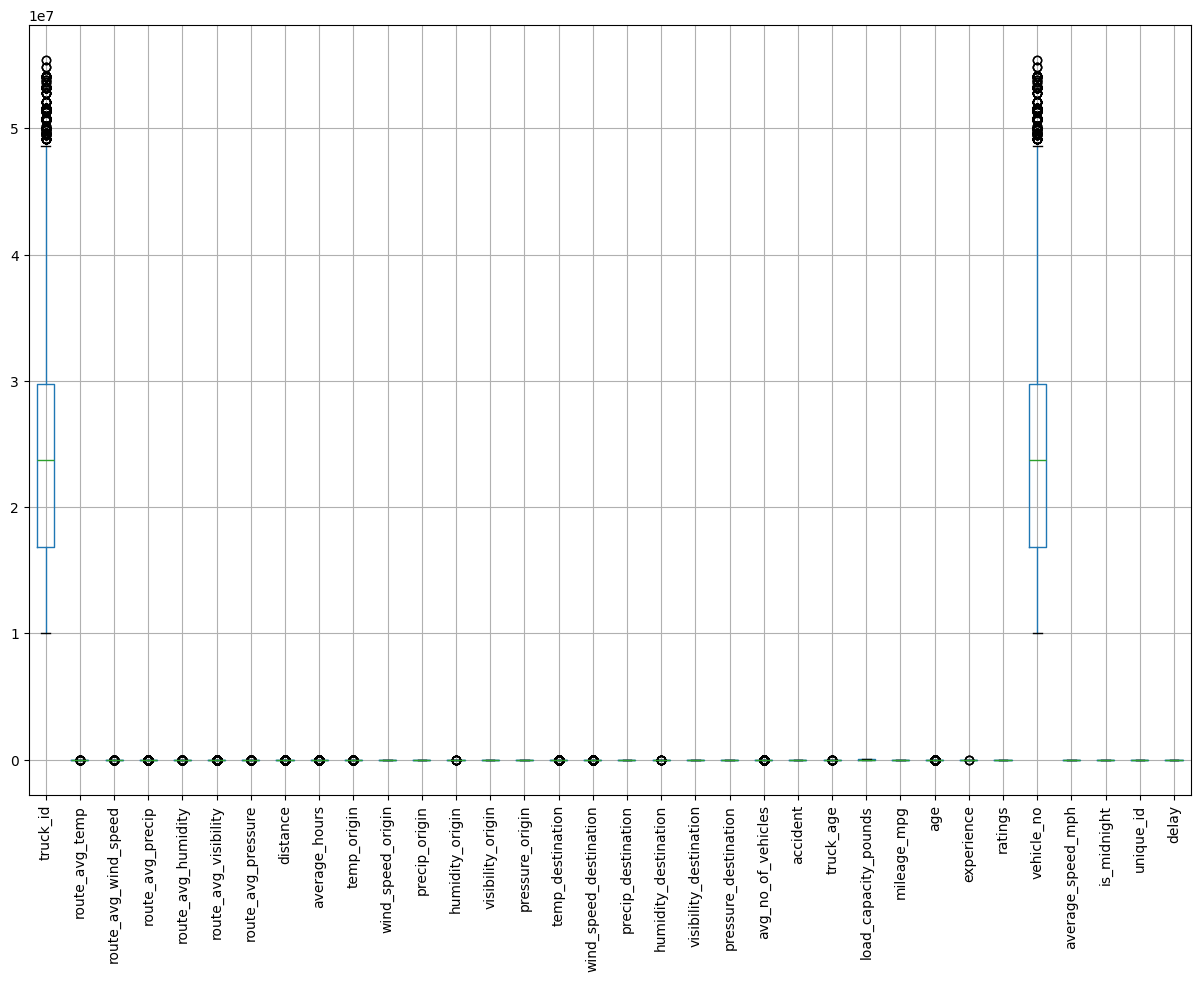

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for all numerical columns
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
final_df[numerical_columns].boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [12]:
# Check the distribution of categorical columns
categorical_columns = final_df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(final_df[column].value_counts())
    print("\n")


Value counts for route_id:
route_id
R-d95cb7ea    8
R-8d7fcaf1    8
R-34f59601    8
R-d2df2fb9    8
R-7b48266a    8
             ..
R-af25bffd    1
R-91681ef8    1
R-0420f35d    1
R-7e706884    1
R-f8364728    1
Name: count, Length: 2298, dtype: int64


Value counts for route_description:
route_description
Clear                                  3390
Sunny                                  1905
Partly cloudy                          1094
Patchy rain possible                    526
Overcast                                460
Cloudy                                  450
Light rain shower                       423
Moderate or heavy rain shower           376
Mist                                    255
Light drizzle                           185
Fog                                     146
Light rain                              142
Heavy snow                              133
Moderate rain                           109
Moderate snow                            73
Light snow                      

In [13]:
final_df.dtypes

truck_id                                        int64
route_id                                       object
departure_date                    datetime64[us, UTC]
estimated_arrival                 datetime64[us, UTC]
route_avg_temp                                float64
route_avg_wind_speed                          float64
route_avg_precip                              float64
route_avg_humidity                            float64
route_avg_visibility                          float64
route_avg_pressure                            float64
route_description                              object
estimated_arrival_nearest_hour    datetime64[us, UTC]
departure_date_nearest_hour       datetime64[us, UTC]
origin_id                                      object
destination_id                                 object
distance                                      float64
average_hours                                 float64
temp_origin                                   float64
wind_speed_origin           

In [14]:
import pandas as pd

# Exclude 'truck_id' and 'unique_id' from numeric columns
numeric_columns = final_df.select_dtypes(include=['int64', 'int32', 'float64']).columns
numeric_columns = numeric_columns.drop(['truck_id', 'unique_id'])

# Function to impute outliers
def impute_outliers_with_median(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        
        # Replace outliers with the median
        median_value = df[col].median()
        df.loc[outliers, col] = median_value

    return df

# Apply the function to your final_df
final_df = impute_outliers_with_median(final_df, numeric_columns)

# Check if outliers have been handled
print(final_df.describe())


           truck_id  route_avg_temp  route_avg_wind_speed  route_avg_precip  \
count  1.029000e+04    10290.000000          10290.000000           10290.0   
mean   2.411952e+07       58.749193              7.731025               0.0   
std    9.220471e+06       13.190300              2.901605               0.0   
min    1.000839e+07       21.333333              0.000000               0.0   
25%    1.682552e+07       49.578571              5.666667               0.0   
50%    2.373602e+07       59.333333              7.500000               0.0   
75%    2.974647e+07       68.333333              9.666667               0.0   
max    5.543782e+07       95.000000             16.000000               0.0   

       route_avg_humidity  route_avg_visibility  route_avg_pressure  \
count        10290.000000          10290.000000        10290.000000   
mean            71.969306              5.596709         1015.095853   
std             13.951677              0.686699            4.230110   
min 

In [15]:
final_df

,truck_id,route_id,departure_date,estimated_arrival,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,...,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight,unique_id,delay
0,16965717,R-0e4bf1f5,2019-02-03 06:00:00+00:00,2019-02-03 12:00:00+00:00,65.500000,8.500000,0.0,95.000000,6.0,1015.000000,...,male,50,17,conservative,8,16965717,33.31,0,8518,0
1,17709480,R-05e62825,2019-01-01 06:00:00+00:00,2019-01-06 12:00:00+00:00,72.454545,10.590909,0.0,76.545455,6.0,1014.636364,...,male,45,11,proactive,6,17709480,62.22,1,7091,1
2,20339561,R-3d1310d5,2019-01-04 06:00:00+00:00,2019-01-05 00:00:00+00:00,69.500000,12.250000,0.0,73.250000,6.0,1016.500000,...,male,49,8,conservative,7,20339561,33.94,1,5129,0
3,19424012,R-f56dfb6f,2019-02-02 06:00:00+00:00,2019-02-04 12:00:00+00:00,57.200000,6.500000,0.0,92.000000,4.0,1012.300000,...,male,55,21,conservative,4,19424012,50.73,1,6443,0
4,17260588,R-405658e2,2019-01-25 06:00:00+00:00,2019-01-26 06:00:00+00:00,74.400000,13.200000,0.0,52.600000,6.0,1013.400000,...,male,50,9,proactive,4,17260588,61.66,1,6231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,17142878,R-d73c56ee,2019-02-06 06:00:00+00:00,2019-02-06 12:00:00+00:00,75.500000,9.000000,0.0,46.500000,6.0,1017.000000,...,male,54,24,conservative,8,17142878,53.40,0,7018,1
10286,21716796,R-d97d07a5,2019-02-03 06:00:00+00:00,2019-02-03 12:00:00+00:00,67.000000,4.500000,0.0,67.500000,6.0,1015.500000,...,male,43,6,proactive,2,21716796,60.19,0,8751,1
10287,29780011,R-70268c8c,2019-01-22 06:00:00+00:00,2019-01-23 06:00:00+00:00,68.800000,8.600000,0.0,65.800000,6.0,1015.800000,...,male,44,9,conservative,3,29780011,52.16,1,1947,1
10288,20558404,R-6618dc7d,2019-02-06 06:00:00+00:00,2019-02-06 18:00:00+00:00,64.000000,5.666667,0.0,92.000000,6.0,1012.666667,...,male,46,8,conservative,7,20558404,43.69,0,1942,1


In [16]:
# Flatten any multi-index columns if they exist
final_df.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in final_df.columns]

# Now try selecting numeric columns again, excluding 'truck_id' and 'unique_id'
numeric_columns = final_df.select_dtypes(include=['int64', 'int32', 'float64']).columns
numeric_columns = numeric_columns.drop(['truck_id', 'unique_id'])

# Print out numeric columns to verify they are properly formatted
print(numeric_columns)


Index(['route_avg_temp', 'route_avg_wind_speed', 'route_avg_precip',
       'route_avg_humidity', 'route_avg_visibility', 'route_avg_pressure',
       'distance', 'average_hours', 'temp_origin', 'wind_speed_origin',
       'precip_origin', 'humidity_origin', 'visibility_origin',
       'pressure_origin', 'temp_destination', 'wind_speed_destination',
       'precip_destination', 'humidity_destination', 'visibility_destination',
       'pressure_destination', 'avg_no_of_vehicles', 'accident', 'truck_age',
       'load_capacity_pounds', 'mileage_mpg', 'age', 'experience', 'ratings',
       'vehicle_no', 'average_speed_mph', 'is_midnight', 'delay'],
      dtype='object')


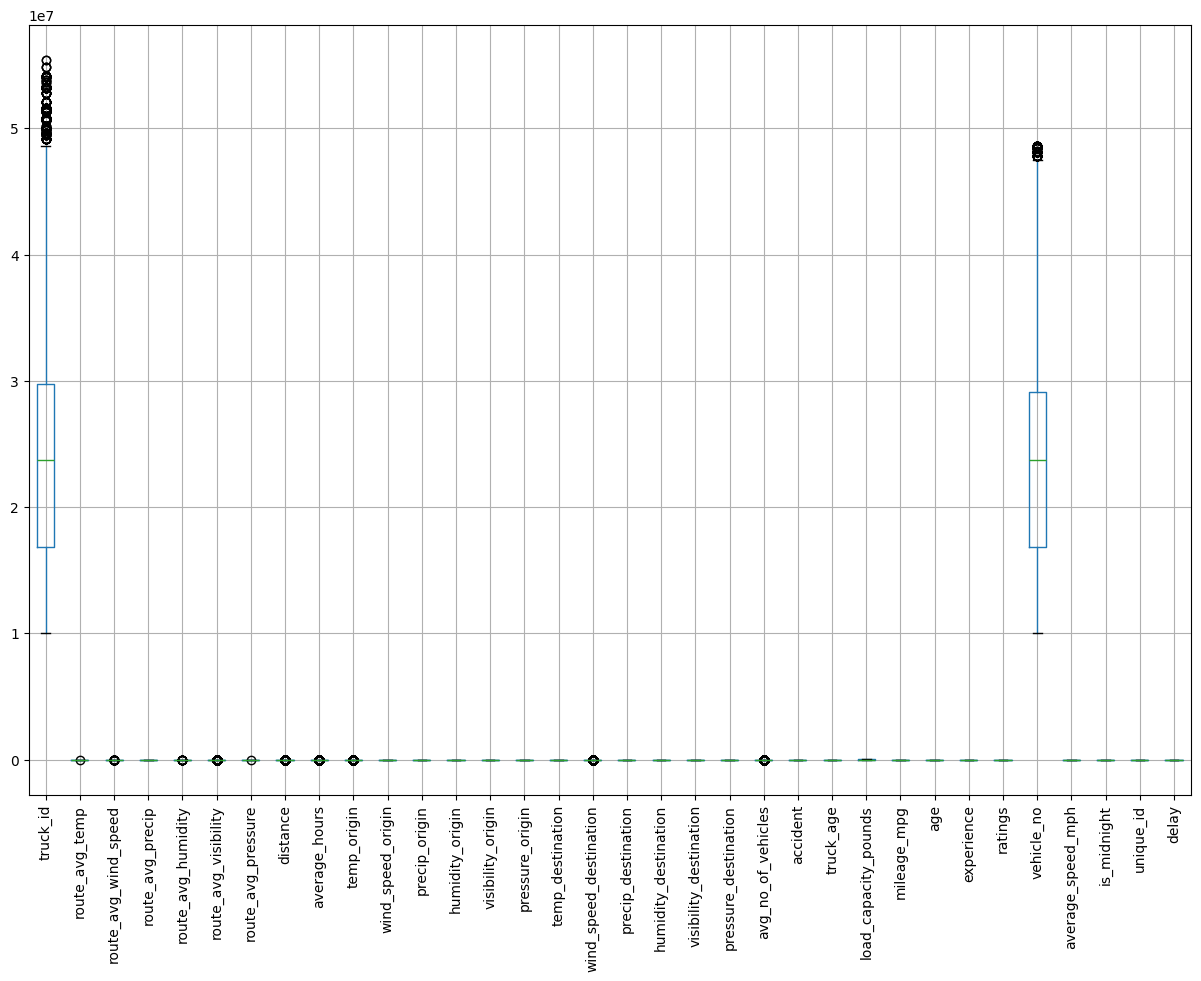

In [17]:
# Create box plots for all numerical columns
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
final_df[numerical_columns].boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


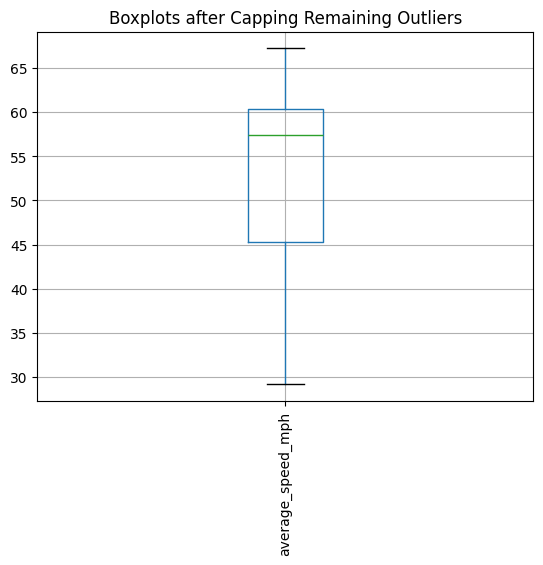

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to cap the extreme outliers at the upper and lower bounds
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for capping
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers instead of replacing them with the median
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    
    return df

# Reapply for columns where outliers still exist (e.g. 'average_speed_mph')
columns_with_outliers = ['average_speed_mph']  # Add other columns if needed
final_df = cap_outliers(final_df, columns_with_outliers)

# Check if outliers are capped
final_df.boxplot(column=columns_with_outliers, rot=90)
plt.title('Boxplots after Capping Remaining Outliers')
plt.show()


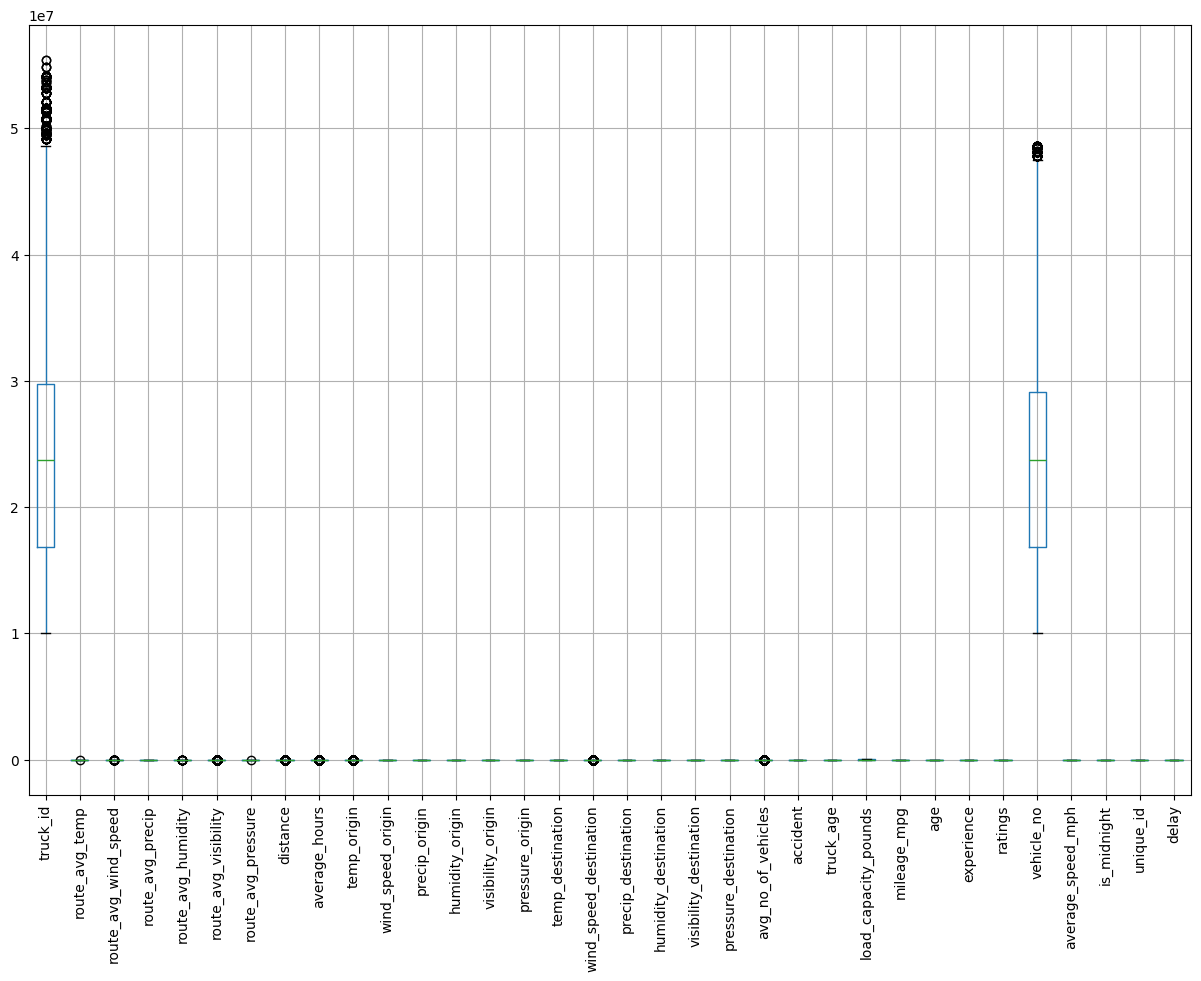

In [19]:
# Create box plots for all numerical columns
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
final_df[numerical_columns].boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


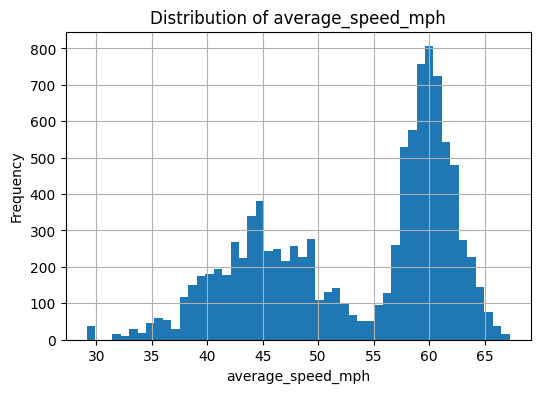

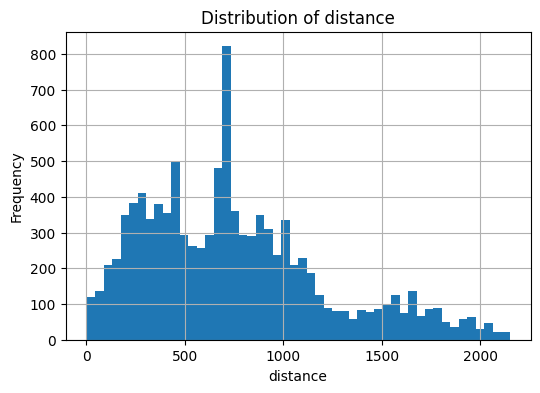

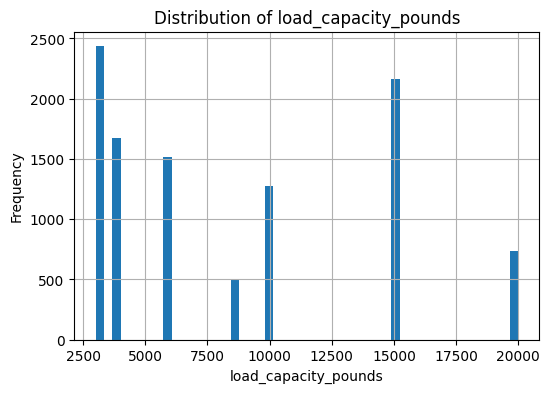

In [20]:
# Plot distribution for key numeric columns
numeric_columns_to_check = ['average_speed_mph', 'distance', 'load_capacity_pounds']  # Add more as needed

for col in numeric_columns_to_check:
    plt.figure(figsize=(6, 4))
    final_df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [21]:
final_df

,truck_id,route_id,departure_date,estimated_arrival,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,...,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight,unique_id,delay
0,16965717,R-0e4bf1f5,2019-02-03 06:00:00+00:00,2019-02-03 12:00:00+00:00,65.500000,8.500000,0.0,95.000000,6.0,1015.000000,...,male,50,17,conservative,8,16965717,33.31,0,8518,0
1,17709480,R-05e62825,2019-01-01 06:00:00+00:00,2019-01-06 12:00:00+00:00,72.454545,10.590909,0.0,76.545455,6.0,1014.636364,...,male,45,11,proactive,6,17709480,62.22,1,7091,1
2,20339561,R-3d1310d5,2019-01-04 06:00:00+00:00,2019-01-05 00:00:00+00:00,69.500000,12.250000,0.0,73.250000,6.0,1016.500000,...,male,49,8,conservative,7,20339561,33.94,1,5129,0
3,19424012,R-f56dfb6f,2019-02-02 06:00:00+00:00,2019-02-04 12:00:00+00:00,57.200000,6.500000,0.0,92.000000,4.0,1012.300000,...,male,55,21,conservative,4,19424012,50.73,1,6443,0
4,17260588,R-405658e2,2019-01-25 06:00:00+00:00,2019-01-26 06:00:00+00:00,74.400000,13.200000,0.0,52.600000,6.0,1013.400000,...,male,50,9,proactive,4,17260588,61.66,1,6231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,17142878,R-d73c56ee,2019-02-06 06:00:00+00:00,2019-02-06 12:00:00+00:00,75.500000,9.000000,0.0,46.500000,6.0,1017.000000,...,male,54,24,conservative,8,17142878,53.40,0,7018,1
10286,21716796,R-d97d07a5,2019-02-03 06:00:00+00:00,2019-02-03 12:00:00+00:00,67.000000,4.500000,0.0,67.500000,6.0,1015.500000,...,male,43,6,proactive,2,21716796,60.19,0,8751,1
10287,29780011,R-70268c8c,2019-01-22 06:00:00+00:00,2019-01-23 06:00:00+00:00,68.800000,8.600000,0.0,65.800000,6.0,1015.800000,...,male,44,9,conservative,3,29780011,52.16,1,1947,1
10288,20558404,R-6618dc7d,2019-02-06 06:00:00+00:00,2019-02-06 18:00:00+00:00,64.000000,5.666667,0.0,92.000000,6.0,1012.666667,...,male,46,8,conservative,7,20558404,43.69,0,1942,1


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Defining continuous and categorical columns
cts_cols = ['route_avg_temp', 'route_avg_wind_speed', 'route_avg_precip', 
            'route_avg_humidity', 'route_avg_visibility', 'route_avg_pressure',
            'distance', 'average_hours', 'temp_origin', 'wind_speed_origin',
            'precip_origin', 'humidity_origin', 'visibility_origin', 'pressure_origin',
            'temp_destination', 'wind_speed_destination', 'precip_destination',
            'humidity_destination', 'visibility_destination', 'pressure_destination',
            'avg_no_of_vehicles', 'truck_age', 'load_capacity_pounds', 'mileage_mpg',
            'age', 'experience', 'average_speed_mph']

# Categorical columns
cat_cols = ['route_description', 'description_origin', 'description_destination',
            'accident', 'fuel_type', 'gender', 'driving_style', 'ratings', 'is_midnight']

target = ['delay']




In [23]:
# Make estimated_arrival timezone-naive
final_df['estimated_arrival'] = final_df['estimated_arrival'].dt.tz_convert(None)
# Check the date range of 'estimated_arrival'
print(f"Date Range: {final_df['estimated_arrival'].min()} to {final_df['estimated_arrival'].max()}")

# Splitting data based on the estimated arrival date
train_df = final_df[final_df['estimated_arrival'] <= pd.to_datetime('2019-01-30')]
validation_df = final_df[(final_df['estimated_arrival'] > pd.to_datetime('2019-01-30')) &
                         (final_df['estimated_arrival'] <= pd.to_datetime('2019-02-07'))]
test_df = final_df[final_df['estimated_arrival'] > pd.to_datetime('2019-02-07')]







Date Range: 2019-01-01 12:00:00 to 2019-02-14 18:00:00


In [24]:
# Splitting features (X) and target (y)
X_train = train_df[cts_cols + cat_cols]
y_train = train_df['delay']

X_valid = validation_df[cts_cols + cat_cols]
y_valid = validation_df['delay']

X_test = test_df[cts_cols + cat_cols]
y_test = test_df['delay']



In [25]:
# Columns to be encoded
encode_columns = ['route_description', 'description_origin', 'description_destination',
                  'fuel_type', 'gender', 'driving_style']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')

# Fit the encoder to the training data
encoder.fit(X_train[encode_columns])

# Generating the new names for the encoded features
encoded_features = list(encoder.get_feature_names_out(encode_columns))

# Transforming the categorical columns for train, validation, and test
X_train_encoded = pd.DataFrame(encoder.transform(X_train[encode_columns]), columns=encoded_features, index=X_train.index)
X_valid_encoded = pd.DataFrame(encoder.transform(X_valid[encode_columns]), columns=encoded_features, index=X_valid.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[encode_columns]), columns=encoded_features, index=X_test.index)

# Concatenating the encoded columns back to the original DataFrames
X_train = pd.concat([X_train.drop(encode_columns, axis=1), X_train_encoded], axis=1)
X_valid = pd.concat([X_valid.drop(encode_columns, axis=1), X_valid_encoded], axis=1)
X_test = pd.concat([X_test.drop(encode_columns, axis=1), X_test_encoded], axis=1)



2024-10-18 20:40:32,027 WARNING: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros

2024-10-18 20:40:32,030 WARNING: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



The error occurs because there are categories in the validation or test sets that were not present in the training data. In this case, 'Ice pellets' is a category in one of the columns during transformation that the encoder did not encounter while fitting on the training data.

In [26]:
# Scaling the numerical columns
scaler = StandardScaler()

# Fit the scaler on the training data and apply it to train, validation, and test sets
X_train[cts_cols] = scaler.fit_transform(X_train[cts_cols])
X_valid[cts_cols] = scaler.transform(X_valid[cts_cols])
X_test[cts_cols] = scaler.transform(X_test[cts_cols])

# Now you have X_train, X_valid, and X_test ready for modeling
print("Training, validation, and test sets prepared successfully!")

Training, validation, and test sets prepared successfully!


In [27]:
# Getting the number of columns in each dataset
train_columns = X_train.shape[1]
valid_columns = X_valid.shape[1]
test_columns = X_test.shape[1]

print(f"Number of columns in Train Set: {train_columns}")
print(f"Number of columns in Validation Set: {valid_columns}")
print(f"Number of columns in Test Set: {test_columns}")


Number of columns in Train Set: 99
Number of columns in Validation Set: 99
Number of columns in Test Set: 99


In [28]:
# Getting the shape of each dataset
train_shape = X_train.shape
valid_shape = X_valid.shape
test_shape = X_test.shape

print(f"Shape of Train Set: {train_shape}")  # Rows, Columns
print(f"Shape of Validation Set: {valid_shape}")  # Rows, Columns
print(f"Shape of Test Set: {test_shape}")  # Rows, Columns


Shape of Train Set: (6859, 99)
Shape of Validation Set: (1953, 99)
Shape of Test Set: (1478, 99)


model:logistic regression

In [29]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Start the MLflow run and set up experiment tracking
mlflow.set_experiment("Logistic_Regression_Experiment")

with mlflow.start_run(run_name="Logistic_Regression_GridSearch") as run:
    print(f"MLflow Run ID: {run.info.run_id}")


MLflow Run ID: d5c1cd1557a440af9346ce07567624b3


In [30]:
# Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear')  # You can change the solver if needed

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')


In [31]:
# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Log hyperparameters to MLflow
mlflow.log_params(grid_search.best_params_)

# Log the best model
mlflow.sklearn.log_model(grid_search.best_estimator_, "Logistic_Regression_Model")


2024/10/18 20:40:32 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '622a802d9b8d411db1afd69b6dee01bd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/10/18 20:40:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. S

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on validation data
y_valid_pred = grid_search.predict(X_valid)

# Calculate validation metrics
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)

# Log metrics to MLflow
mlflow.log_metric("validation_accuracy", accuracy)
mlflow.log_metric("validation_precision", precision)
mlflow.log_metric("validation_recall", recall)
mlflow.log_metric("validation_f1", f1)

# Print the results
print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation F1 Score: {f1}")


2024/10/18 20:40:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Validation Accuracy: 0.6799795186891961
Validation Precision: 0.6653543307086615
Validation Recall: 0.2383638928067701
Validation F1 Score: 0.3509865005192108


In [33]:
# Predict on test data
y_test_pred = grid_search.predict(X_test)

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Log test metrics to MLflow
mlflow.log_metric("test_accuracy", test_accuracy)
mlflow.log_metric("test_precision", test_precision)
mlflow.log_metric("test_recall", test_recall)
mlflow.log_metric("test_f1", test_f1)

# Print the results
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")


2024/10/18 20:40:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Test Accuracy: 0.6542625169147497
Test Precision: 0.7963636363636364
Test Recall: 0.3249258160237389
Test F1 Score: 0.46153846153846156


In [34]:
# Log the best model to MLflow
mlflow.sklearn.log_model(grid_search.best_estimator_, "final_logistic_regression_model")

# End the MLflow run
mlflow.end_run()


2024/10/18 20:40:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


    RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)


In [36]:
# Train the model using GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_model = grid_search_rf.best_estimator_

# Print the best hyperparameters
print("Best Random Forest Hyperparameters: ", grid_search_rf.best_params_)


2024/10/18 20:40:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '405f358802224616b81e02c8f499f2ac', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/10/18 20:40:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. S

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total

2024/10/18 20:41:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [37]:
import mlflow
import mlflow.sklearn

# Start logging
with mlflow.start_run(run_name="Random_Forest"):
    # Log hyperparameters
    mlflow.log_params(grid_search_rf.best_params_)
    
    # Log the best model
    mlflow.sklearn.log_model(best_rf_model, "Random_Forest_Model")


2024/10/17 23:29:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Validation set predictions
y_valid_pred = best_rf_model.predict(X_valid)

# Test set predictions
y_test_pred = best_rf_model.predict(X_test)

# Validation Metrics
val_accuracy = accuracy_score(y_valid, y_valid_pred)
val_precision = precision_score(y_valid, y_valid_pred)
val_recall = recall_score(y_valid, y_valid_pred)
val_f1 = f1_score(y_valid, y_valid_pred)

# Test Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Log the results to MLFlow
mlflow.log_metric("Validation Accuracy", val_accuracy)
mlflow.log_metric("Validation Precision", val_precision)
mlflow.log_metric("Validation Recall", val_recall)
mlflow.log_metric("Validation F1 Score", val_f1)

mlflow.log_metric("Test Accuracy", test_accuracy)
mlflow.log_metric("Test Precision", test_precision)
mlflow.log_metric("Test Recall", test_recall)
mlflow.log_metric("Test F1 Score", test_f1)

# Print the results
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1 Score: {val_f1}")

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")


Validation Accuracy: 0.728110599078341
Validation Precision: 0.7528409090909091
Validation Recall: 0.37376586741889983
Validation F1 Score: 0.49952874646559847
Test Accuracy: 0.7110960757780784
Test Precision: 0.8079800498753117
Test Recall: 0.4807121661721068
Test F1 Score: 0.6027906976744186


XG boost

In [39]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Train the model using GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Log hyperparameters to MLflow
mlflow.log_params(grid_search_xgb.best_params_)

# Log the best model
mlflow.sklearn.log_model(grid_search_xgb.best_estimator_, "XGBoost_Model")

# Print the best parameters
print("Best hyperparameters: ", grid_search_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:01] WARNING

2024-10-17 23:29:21,817 WARNING: UserWarning: [23:29:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




2024/10/17 23:29:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/17 23:29:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/p

Best hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions for validation and test sets
y_valid_pred = grid_search_xgb.predict(X_valid)
y_test_pred = grid_search_xgb.predict(X_test)

# Validation Metrics
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_precision = precision_score(y_valid, y_valid_pred)
valid_recall = recall_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)

# Test Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Log metrics to MLflow
mlflow.log_metric("Validation Accuracy", valid_accuracy)
mlflow.log_metric("Validation Precision", valid_precision)
mlflow.log_metric("Validation Recall", valid_recall)
mlflow.log_metric("Validation F1 Score", valid_f1)

mlflow.log_metric("Test Accuracy", test_accuracy)
mlflow.log_metric("Test Precision", test_precision)
mlflow.log_metric("Test Recall", test_recall)
mlflow.log_metric("Test F1 Score", test_f1)

# Print validation and test metrics
print(f"Validation Accuracy: {valid_accuracy}")
print(f"Validation Precision: {valid_precision}")
print(f"Validation Recall: {valid_recall}")
print(f"Validation F1 Score: {valid_f1}")

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")


2024/10/17 23:29:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/17 23:29:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/p

Validation Accuracy: 0.7270865335381465
Validation Precision: 0.727979274611399
Validation Recall: 0.39633286318758815
Validation F1 Score: 0.5132420091324201
Test Accuracy: 0.7124492557510149
Test Precision: 0.7971360381861575
Test Recall: 0.49554896142433236
Test F1 Score: 0.6111619396157365


Comparison with Other Models:
XGBoost outperforms Logistic Regression in both precision and recall.
It also slightly outperforms Random Forest in terms of F1 Score, indicating a better balance between precision and recall.
Conclusion:
XGBoost has performed well in balancing between precision and recall. It could be the better model so far, but further tuning or ensembling methods may improve it.

i was not satisfied with the above results so i was going for further tuning


i was not satisfied with the above results so i was going for further tuning


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Since 'liblinear' supports L1 and L2 penalties
}

# Initialize the model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using GridSearchCV
grid_search_logreg.fit(X_train, y_train)

# Log the best parameters and model using MLFlow
mlflow.log_params(grid_search_logreg.best_params_)
mlflow.sklearn.log_model(grid_search_logreg.best_estimator_, "Logistic_Regression_Model_Tuned")

# Evaluate on validation and test sets
logreg_best = grid_search_logreg.best_estimator_

# Validation performance
y_valid_pred_logreg = logreg_best.predict(X_valid)
print("Validation Accuracy (Logistic Regression):", accuracy_score(y_valid, y_valid_pred_logreg))

# Test performance
y_test_pred_logreg = logreg_best.predict(X_test)
print("Test Accuracy (Logistic Regression):", accuracy_score(y_test, y_test_pred_logreg))


2024/10/17 23:29:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Validation Accuracy (Logistic Regression): 0.6799795186891961
Test Accuracy (Logistic Regression): 0.6542625169147497


In [42]:
import mlflow
import mlflow.sklearn

mlflow.end_run()

# Start a new MLflow run
with mlflow.start_run():
    
    # Train the model using GridSearchCV
    grid_search.fit(X_train, y_train)

    # Log hyperparameters to MLflow
    mlflow.log_params(grid_search.best_params_)

    # Log the best model
    mlflow.sklearn.log_model(grid_search.best_estimator_, "Tuned_Model")

    # Evaluate on validation and test sets
    y_valid_pred = grid_search.best_estimator_.predict(X_valid)
    y_test_pred = grid_search.best_estimator_.predict(X_test)

    # Calculate and log performance metrics
    validation_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    mlflow.log_metric("validation_accuracy", validation_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    print("Validation Accuracy:", validation_accuracy)
    print("Test Accuracy:", test_accuracy)


2024/10/17 23:29:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Validation Accuracy: 0.6799795186891961
Test Accuracy: 0.6542625169147497


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Log the best parameters and model using MLFlow
mlflow.log_params(grid_search_rf.best_params_)
mlflow.sklearn.log_model(grid_search_rf.best_estimator_, "Random_Forest_Model_Tuned")

# Evaluate on validation and test sets
rf_best = grid_search_rf.best_estimator_

# Validation performance
y_valid_pred_rf = rf_best.predict(X_valid)
print("Validation Accuracy (Random Forest):", accuracy_score(y_valid, y_valid_pred_rf))

# Test performance
y_test_pred_rf = rf_best.predict(X_test)
print("Test Accuracy (Random Forest):", accuracy_score(y_test, y_test_pred_rf))


2024/10/17 23:29:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Validation Accuracy (Random Forest): 0.7265745007680492
Test Accuracy (Random Forest): 0.7016238159675237


In [44]:
import mlflow

# End the current run if one is active
mlflow.end_run()

# Start a new run for the new configuration
with mlflow.start_run():
    # Train the model using GridSearchCV
    grid_search_xgb.fit(X_train, y_train)

    # Log the best parameters and model using MLflow
    mlflow.log_params(grid_search_xgb.best_params_)
    mlflow.sklearn.log_model(grid_search_xgb.best_estimator_, "XGBoost_Model_Tuned")

    # Evaluate on validation and test sets
    y_valid_pred = grid_search_xgb.best_estimator_.predict(X_valid)
    y_test_pred = grid_search_xgb.best_estimator_.predict(X_test)

    # Log metrics
    validation_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    mlflow.log_metric("validation_accuracy", validation_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    print("Validation Accuracy:", validation_accuracy)
    print("Test Accuracy:", test_accuracy)


/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:29:59] WARNING

2024-10-17 23:30:17,240 WARNING: UserWarning: [23:30:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




2024/10/17 23:30:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/17 23:30:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/p

Validation Accuracy: 0.7270865335381465
Test Accuracy: 0.7124492557510149


In [45]:
from xgboost import XGBClassifier

# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the model
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Log the best parameters and model using MLFlow
mlflow.log_params(grid_search_xgb.best_params_)
mlflow.sklearn.log_model(grid_search_xgb.best_estimator_, "XGBoost_Model_Tuned")

# Evaluate on validation and test sets
xgb_best = grid_search_xgb.best_estimator_

# Validation performance
y_valid_pred_xgb = xgb_best.predict(X_valid)
print("Validation Accuracy (XGBoost):", accuracy_score(y_valid, y_valid_pred_xgb))

# Test performance
y_test_pred_xgb = xgb_best.predict(X_test)
print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_test_pred_xgb))


2024/10/17 23:30:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b835904e9d054b8a88bb2686c1e4d754', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2024/10/17 23:30:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. S

Validation Accuracy (XGBoost): 0.7265745007680492
Test Accuracy (XGBoost): 0.7050067658998647


In [46]:
import mlflow
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# End the current run if one is active
mlflow.end_run()

# Start a new MLflow run for the new configuration
with mlflow.start_run():
    # Train the model using GridSearchCV
    grid_search_xgb.fit(X_train, y_train)

    # Log the best parameters and model using MLflow
    mlflow.log_params(grid_search_xgb.best_params_)
    mlflow.sklearn.log_model(grid_search_xgb.best_estimator_, "XGBoost_Model_Tuned")

    # Predict on training, validation, and test sets
    y_train_pred = grid_search_xgb.best_estimator_.predict(X_train)
    y_valid_pred = grid_search_xgb.best_estimator_.predict(X_valid)
    y_test_pred = grid_search_xgb.best_estimator_.predict(X_test)

    # Calculate and log training scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("train_precision", train_precision)
    mlflow.log_metric("train_recall", train_recall)
    mlflow.log_metric("train_f1_score", train_f1)

    # Calculate and log validation scores
    validation_accuracy = accuracy_score(y_valid, y_valid_pred)
    validation_precision = precision_score(y_valid, y_valid_pred)
    validation_recall = recall_score(y_valid, y_valid_pred)
    validation_f1 = f1_score(y_valid, y_valid_pred)

    mlflow.log_metric("validation_accuracy", validation_accuracy)
    mlflow.log_metric("validation_precision", validation_precision)
    mlflow.log_metric("validation_recall", validation_recall)
    mlflow.log_metric("validation_f1_score", validation_f1)

    # Calculate and log test scores
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.log_metric("test_f1_score", test_f1)

    # Print out the metrics
    print("Training Accuracy:", train_accuracy)
    print("Validation Accuracy:", validation_accuracy)
    print("Test Accuracy:", test_accuracy)

    print("Training F1 Score:", train_f1)
    print("Validation F1 Score:", validation_f1)
    print("Test F1 Score:", test_f1)


2024/10/17 23:30:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/17 23:30:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/p

Training Accuracy: 0.8451669339553871
Validation Accuracy: 0.7265745007680492
Test Accuracy: 0.7050067658998647
Training F1 Score: 0.702354260089686
Validation F1 Score: 0.4952741020793951
Test F1 Score: 0.5940409683426443


In [1]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define Random Forest parameters for GridSearch
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, verbose=1)

# Initialize MLflow for tracking
mlflow.sklearn.autolog()

# End any active MLflow run before starting a new one
mlflow.end_run()

with mlflow.start_run():
    # Fit the model using GridSearchCV
    grid_search_rf.fit(X_train, y_train)

    # Log the best hyperparameters and model using MLFlow
    mlflow.log_params(grid_search_rf.best_params_)
    mlflow.sklearn.log_model(grid_search_rf.best_estimator_, "Random_Forest_Model_Tuned")

    # Get the best model
    best_rf_model = grid_search_rf.best_estimator_

    # Predictions for train, validation, and test sets
    y_train_pred_rf = best_rf_model.predict(X_train)
    y_valid_pred_rf = best_rf_model.predict(X_valid)
    y_test_pred_rf = best_rf_model.predict(X_test)

    # Calculate metrics
    train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
    valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
    test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

    train_f1_rf = f1_score(y_train, y_train_pred_rf)
    valid_f1_rf = f1_score(y_valid, y_valid_pred_rf)
    test_f1_rf = f1_score(y_test, y_test_pred_rf)

    print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
    print(f"Random Forest Validation Accuracy: {valid_accuracy_rf}")
    print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

    print(f"Random Forest Training F1 Score: {train_f1_rf}")
    print(f"Random Forest Validation F1 Score: {valid_f1_rf}")
    print(f"Random Forest Test F1 Score: {test_f1_rf}")

# End the current MLflow run
mlflow.end_run()


NameError: name 'X_train' is not defined

In [51]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define Logistic Regression parameters for GridSearch
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Create the Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42, max_iter=500)

# Set up GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_clf, param_grid=param_grid_lr, cv=5, verbose=1)

# End any active MLflow run before starting a new one
mlflow.end_run()

with mlflow.start_run():
    # Fit the model using GridSearchCV
    grid_search_lr.fit(X_train, y_train)

    # Log the best hyperparameters and model using MLFlow
    mlflow.log_params(grid_search_lr.best_params_)
    mlflow.sklearn.log_model(grid_search_lr.best_estimator_, "Logistic_Regression_Model_Tuned")

    # Get the best model
    best_lr_model = grid_search_lr.best_estimator_

    # Predictions for train, validation, and test sets
    y_train_pred_lr = best_lr_model.predict(X_train)
    y_valid_pred_lr = best_lr_model.predict(X_valid)
    y_test_pred_lr = best_lr_model.predict(X_test)

    # Calculate metrics
    train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
    valid_accuracy_lr = accuracy_score(y_valid, y_valid_pred_lr)
    test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

    train_f1_lr = f1_score(y_train, y_train_pred_lr)
    valid_f1_lr = f1_score(y_valid, y_valid_pred_lr)
    test_f1_lr = f1_score(y_test, y_test_pred_lr)

    print(f"Logistic Regression Training Accuracy: {train_accuracy_lr}")
    print(f"Logistic Regression Validation Accuracy: {valid_accuracy_lr}")
    print(f"Logistic Regression Test Accuracy: {test_accuracy_lr}")

    print(f"Logistic Regression Training F1 Score: {train_f1_lr}")
    print(f"Logistic Regression Validation F1 Score: {valid_f1_lr}")
    print(f"Logistic Regression Test F1 Score: {test_f1_lr}")

# End the current MLflow run
mlflow.end_run()


2024/10/18 00:46:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 6 candidates, totalling 30 fits


2024/10/18 00:46:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/18 00:46:57 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2024/10/18 00:

Logistic Regression Training Accuracy: 0.7193468435632017
Logistic Regression Validation Accuracy: 0.6799795186891961
Logistic Regression Test Accuracy: 0.6542625169147497
Logistic Regression Training F1 Score: 0.3792325056433409
Logistic Regression Validation F1 Score: 0.3509865005192108
Logistic Regression Test F1 Score: 0.46153846153846156


random forest by using differenet parameteers

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.sklearn

# Assuming you have already split the data into X_train, X_valid, X_test, y_train, y_valid, y_test

# Start an MLflow run
mlflow.start_run()

# Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define parameter grid for Random Forest tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [3, 5, 7],  # Limit tree depth
    'min_samples_split': [5, 10, 15],  # Min samples for splitting
    'min_samples_leaf': [5, 10, 15],  # Min samples per leaf
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for best split
    'class_weight': ['balanced']  # Handling class imbalance
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Log the best hyperparameters to MLflow
mlflow.log_params(grid_search_rf.best_params_)

# Evaluate the best model on training, validation, and test sets
y_train_pred_rf = best_rf_model.predict(X_train)
y_valid_pred_rf = best_rf_model.predict(X_valid)
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy and F1 scores for train, validation, and test sets
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_f1_rf = f1_score(y_train, y_train_pred_rf)
valid_f1_rf = f1_score(y_valid, y_valid_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Log metrics for training, validation, and test sets to MLflow
mlflow.log_metric("Training Accuracy", train_accuracy_rf)
mlflow.log_metric("Validation Accuracy", valid_accuracy_rf)
mlflow.log_metric("Test Accuracy", test_accuracy_rf)

mlflow.log_metric("Training F1 Score", train_f1_rf)
mlflow.log_metric("Validation F1 Score", valid_f1_rf)
mlflow.log_metric("Test F1 Score", test_f1_rf)

# Log the model to MLflow
mlflow.sklearn.log_model(best_rf_model, "Random_Forest_Model_Tuned")

# Print out the results
print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Validation Accuracy: {valid_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

print(f"Random Forest Training F1 Score: {train_f1_rf}")
print(f"Random Forest Validation F1 Score: {valid_f1_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

# End the MLflow run
mlflow.end_run()


2024/10/18 00:55:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_sa

2024/10/18 00:56:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/18 00:56:20 INFO mlflow.sklearn.utils: Logging the 5 best runs, 157 runs will be omitted.
2024/10/18 00

Random Forest Training Accuracy: 0.7340720221606648
Random Forest Validation Accuracy: 0.7235023041474654
Random Forest Test Accuracy: 0.7625169147496617
Random Forest Training F1 Score: 0.6105892399658411
Random Forest Validation F1 Score: 0.615931721194879
Random Forest Test F1 Score: 0.7358916478555305


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.sklearn

# Start an MLflow run
mlflow.start_run()

# Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define an extended parameter grid for Random Forest tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # More trees
    'max_depth': [10, 15, 20],  # Increase max depth
    'min_samples_split': [2, 5, 10],  # Split control
    'min_samples_leaf': [1, 2, 5],  # Control for leaf size
    'max_features': ['sqrt', 'log2'],  # Feature selection
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Log the best hyperparameters to MLflow
mlflow.log_params(grid_search_rf.best_params_)

# Evaluate the best model on training, validation, and test sets
y_train_pred_rf = best_rf_model.predict(X_train)
y_valid_pred_rf = best_rf_model.predict(X_valid)
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy and F1 scores for train, validation, and test sets
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_f1_rf = f1_score(y_train, y_train_pred_rf)
valid_f1_rf = f1_score(y_valid, y_valid_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Log metrics for training, validation, and test sets to MLflow
mlflow.log_metric("Training Accuracy", train_accuracy_rf)
mlflow.log_metric("Validation Accuracy", valid_accuracy_rf)
mlflow.log_metric("Test Accuracy", test_accuracy_rf)

mlflow.log_metric("Training F1 Score", train_f1_rf)
mlflow.log_metric("Validation F1 Score", valid_f1_rf)
mlflow.log_metric("Test F1 Score", test_f1_rf)

# Log the model to MLflow
mlflow.sklearn.log_model(best_rf_model, "Random_Forest_Model_Tuned")

# Print out the results
print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Validation Accuracy: {valid_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

print(f"Random Forest Training F1 Score: {train_f1_rf}")
print(f"Random Forest Validation F1 Score: {valid_f1_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

# End the MLflow run
mlflow.end_run()


2024/10/18 00:58:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2

2024/10/18 01:01:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/18 01:01:06 INFO mlflow.sklearn.utils: Logging the 5 best runs, 157 runs will be omitted.
2024/10/18 01

Random Forest Training Accuracy: 0.9982504738300044
Random Forest Validation Accuracy: 0.7301587301587301
Random Forest Test Accuracy: 0.7266576454668471
Random Forest Training F1 Score: 0.997270245677889
Random Forest Validation F1 Score: 0.5247971145175834
Random Forest Test F1 Score: 0.6347197106690777


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.sklearn

# Start MLflow run
mlflow.start_run()

# Random Forest Classifier with class weights balanced
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Extended parameter grid with increased regularization
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Try fewer trees to avoid overfitting
    'max_depth': [10, 15, 20],  # Limit max depth to prevent overfitting
    'min_samples_split': [5, 10, 15],  # Require more samples to split
    'min_samples_leaf': [5, 10, 20],  # Require larger leaf size
    'max_features': ['sqrt', 'log2']  # Try limiting features
}

# Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=kf, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get best model after GridSearch
best_rf_model = grid_search_rf.best_estimator_

# Log the best hyperparameters to MLflow
mlflow.log_params(grid_search_rf.best_params_)

# Evaluate the best model on training, validation, and test sets
y_train_pred_rf = best_rf_model.predict(X_train)
y_valid_pred_rf = best_rf_model.predict(X_valid)
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy and F1 scores
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_f1_rf = f1_score(y_train, y_train_pred_rf)
valid_f1_rf = f1_score(y_valid, y_valid_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Log metrics to MLflow
mlflow.log_metric("Training Accuracy", train_accuracy_rf)
mlflow.log_metric("Validation Accuracy", valid_accuracy_rf)
mlflow.log_metric("Test Accuracy", test_accuracy_rf)

mlflow.log_metric("Training F1 Score", train_f1_rf)
mlflow.log_metric("Validation F1 Score", valid_f1_rf)
mlflow.log_metric("Test F1 Score", test_f1_rf)

# Log the model to MLflow
mlflow.sklearn.log_model(best_rf_model, "Random_Forest_Model_Optimized")

# Print results
print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Validation Accuracy: {valid_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

print(f"Random Forest Training F1 Score: {train_f1_rf}")
print(f"Random Forest Validation F1 Score: {valid_f1_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

# End MLflow run
mlflow.end_run()


2024/10/18 01:05:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=2

2024/10/18 01:07:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/18 01:07:39 INFO mlflow.sklearn.utils: Logging the 5 best runs, 157 runs will be omitted.
2024/10/18 01

Random Forest Training Accuracy: 0.9066919376002333
Random Forest Validation Accuracy: 0.7439836149513569
Random Forest Test Accuracy: 0.7530446549391069
Random Forest Training F1 Score: 0.8523985239852399
Random Forest Validation F1 Score: 0.6025437201907791
Random Forest Test F1 Score: 0.7034930950446792


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.sklearn

# Start MLflow run
mlflow.start_run()

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Updated hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get best model after GridSearch
best_rf_model = grid_search_rf.best_estimator_

# Log the best hyperparameters to MLflow
mlflow.log_params(grid_search_rf.best_params_)

# Evaluate the best model on training, validation, and test sets
y_train_pred_rf = best_rf_model.predict(X_train)
y_valid_pred_rf = best_rf_model.predict(X_valid)
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy and F1 scores
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_f1_rf = f1_score(y_train, y_train_pred_rf)
valid_f1_rf = f1_score(y_valid, y_valid_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Log metrics to MLflow
mlflow.log_metric("Training Accuracy", train_accuracy_rf)
mlflow.log_metric("Validation Accuracy", valid_accuracy_rf)
mlflow.log_metric("Test Accuracy", test_accuracy_rf)

mlflow.log_metric("Training F1 Score", train_f1_rf)
mlflow.log_metric("Validation F1 Score", valid_f1_rf)
mlflow.log_metric("Test F1 Score", test_f1_rf)

# Log the model to MLflow
mlflow.sklearn.log_model(best_rf_model, "Random_Forest_Model_Tuned")

# Print results
print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Validation Accuracy: {valid_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

print(f"Random Forest Training F1 Score: {train_f1_rf}")
print(f"Random Forest Validation F1 Score: {valid_f1_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

# End MLflow run
mlflow.end_run()


2024/10/18 01:20:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_esti

2024/10/18 01:21:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/18 01:21:25 INFO mlflow.sklearn.utils: Logging the 5 best runs, 157 runs will be omitted.
2024/10/18 01

Random Forest Training Accuracy: 0.9052339991252369
Random Forest Validation Accuracy: 0.7480798771121352
Random Forest Test Accuracy: 0.7564276048714479
Random Forest Training F1 Score: 0.8493975903614458
Random Forest Validation F1 Score: 0.6064
Random Forest Test F1 Score: 0.7063621533442088


xg boost

In [58]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.xgboost
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
mlflow.end_run()
# Start MLflow run
mlflow.xgboost.autolog()
mlflow.start_run()

# XGBoost Classifier without `use_label_encoder`
xgb_clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 6],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [1, 0.1]
}

# GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Get the best model after GridSearch
best_xgb_model = grid_search_xgb.best_estimator_

# Log the best hyperparameters to MLflow
mlflow.log_params(grid_search_xgb.best_params_)

# Evaluate the best model on training, validation, and test sets
y_train_pred_xgb = best_xgb_model.predict(X_train)
y_valid_pred_xgb = best_xgb_model.predict(X_valid)
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate accuracy and F1 scores
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
valid_accuracy_xgb = accuracy_score(y_valid, y_valid_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
valid_f1_xgb = f1_score(y_valid, y_valid_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

# Log metrics to MLflow
mlflow.log_metric("Training Accuracy", train_accuracy_xgb)
mlflow.log_metric("Validation Accuracy", valid_accuracy_xgb)
mlflow.log_metric("Test Accuracy", test_accuracy_xgb)

mlflow.log_metric("Training F1 Score", train_f1_xgb)
mlflow.log_metric("Validation F1 Score", valid_f1_xgb)
mlflow.log_metric("Test F1 Score", test_f1_xgb)

# Log the model to MLflow
mlflow.xgboost.log_model(best_xgb_model, "XGBoost_Model_Tuned")

# Print results
print(f"XGBoost Training Accuracy: {train_accuracy_xgb}")
print(f"XGBoost Validation Accuracy: {valid_accuracy_xgb}")
print(f"XGBoost Test Accuracy: {test_accuracy_xgb}")

print(f"XGBoost Training F1 Score: {train_f1_xgb}")
print(f"XGBoost Validation F1 Score: {valid_f1_xgb}")
print(f"XGBoost Test F1 Score: {test_f1_xgb}")

# End MLflow run
mlflow.end_run()


2024/10/18 13:24:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytre

2024/10/18 13:25:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/18 13:25:16 INFO mlflow.sklearn.utils: Logging the 5 best runs, 251 runs will be omitted.
2024/10/18 13

XGBoost Training Accuracy: 0.8461874908878846
XGBoost Validation Accuracy: 0.7250384024577573
XGBoost Test Accuracy: 0.7178619756427604
XGBoost Training F1 Score: 0.7079988928867976
XGBoost Validation F1 Score: 0.5041551246537396
XGBoost Test F1 Score: 0.6184812442817932


In [59]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.xgboost
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
mlflow.end_run()
# Start MLflow run
mlflow.xgboost.autolog()
mlflow.start_run()

# XGBoost Classifier without `use_label_encoder`
xgb_clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01],
    'max_depth': [3, 4],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0.1, 0.5],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 5],
    'min_child_weight': [1, 5]
}


# GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Get the best model after GridSearch
best_xgb_model = grid_search_xgb.best_estimator_

# Log the best hyperparameters to MLflow
mlflow.log_params(grid_search_xgb.best_params_)

# Evaluate the best model on training, validation, and test sets
y_train_pred_xgb = best_xgb_model.predict(X_train)
y_valid_pred_xgb = best_xgb_model.predict(X_valid)
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate accuracy and F1 scores
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
valid_accuracy_xgb = accuracy_score(y_valid, y_valid_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
valid_f1_xgb = f1_score(y_valid, y_valid_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

# Log metrics to MLflow
mlflow.log_metric("Training Accuracy", train_accuracy_xgb)
mlflow.log_metric("Validation Accuracy", valid_accuracy_xgb)
mlflow.log_metric("Test Accuracy", test_accuracy_xgb)

mlflow.log_metric("Training F1 Score", train_f1_xgb)
mlflow.log_metric("Validation F1 Score", valid_f1_xgb)
mlflow.log_metric("Test F1 Score", test_f1_xgb)

# Log the model to MLflow
mlflow.xgboost.log_model(best_xgb_model, "XGBoost_Model_Tuned")

# Print results
print(f"XGBoost Training Accuracy: {train_accuracy_xgb}")
print(f"XGBoost Validation Accuracy: {valid_accuracy_xgb}")
print(f"XGBoost Test Accuracy: {test_accuracy_xgb}")

print(f"XGBoost Training F1 Score: {train_f1_xgb}")
print(f"XGBoost Validation F1 Score: {valid_f1_xgb}")
print(f"XGBoost Test F1 Score: {test_f1_xgb}")

# End MLflow run
mlflow.end_run()


2024/10/18 13:27:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=

2024/10/18 13:28:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/10/18 13:28:51 INFO mlflow.sklearn.utils: Logging the 5 best runs, 251 runs will be omitted.
2024/10/18 13

XGBoost Training Accuracy: 0.7713952471205715
XGBoost Validation Accuracy: 0.7183819764464926
XGBoost Test Accuracy: 0.699594046008119
XGBoost Training F1 Score: 0.5363690124186872
XGBoost Validation F1 Score: 0.45544554455445546
XGBoost Test F1 Score: 0.5714285714285714


In [61]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import mlflow
import mlflow.xgboost
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
mlflow.end_run()

# Start MLflow run
mlflow.xgboost.autolog()
mlflow.start_run()

# XGBoost Classifier without `use_label_encoder` and early stopping rounds added here
xgb_clf = xgb.XGBClassifier(
    random_state=42, 
    eval_metric='logloss',
    early_stopping_rounds=10  # Early stopping specified in the model itself
)

# Hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01],
    'max_depth': [3, 4],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0.1, 0.5],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 5],
    'min_child_weight': [1, 5]
}

# GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV model with validation set
grid_search_xgb.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],  # Validation set to monitor for early stopping
    verbose=True
)

# Get the best model after GridSearch
best_xgb_model = grid_search_xgb.best_estimator_

# Log the best hyperparameters to MLflow
mlflow.log_params(grid_search_xgb.best_params_)

# Evaluate the best model on training, validation, and test sets
y_train_pred_xgb = best_xgb_model.predict(X_train)
y_valid_pred_xgb = best_xgb_model.predict(X_valid)
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate accuracy and F1 scores
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
valid_accuracy_xgb = accuracy_score(y_valid, y_valid_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
valid_f1_xgb = f1_score(y_valid, y_valid_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

# Log metrics to MLflow
mlflow.log_metric("Training Accuracy", train_accuracy_xgb)
mlflow.log_metric("Validation Accuracy", valid_accuracy_xgb)
mlflow.log_metric("Test Accuracy", test_accuracy_xgb)

mlflow.log_metric("Training F1 Score", train_f1_xgb)
mlflow.log_metric("Validation F1 Score", valid_f1_xgb)
mlflow.log_metric("Test F1 Score", test_f1_xgb)

# Log the model to MLflow
mlflow.xgboost.log_model(best_xgb_model, "XGBoost_Model_Tuned")

# Print results
print(f"XGBoost Training Accuracy: {train_accuracy_xgb}")
print(f"XGBoost Validation Accuracy: {valid_accuracy_xgb}")
print(f"XGBoost Test Accuracy: {test_accuracy_xgb}")

print(f"XGBoost Training F1 Score: {train_f1_xgb}")
print(f"XGBoost Validation F1 Score: {valid_f1_xgb}")
print(f"XGBoost Test F1 Score: {test_f1_xgb}")

# End MLflow run
mlflow.end_run()


2024/10/18 13:35:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=

ValueError: 
All the 1280 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pavankumarradhala/Desktop/projects/Truck_delay/myenv2/lib/python3.10/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'
